## Final Project
### MSDA3050 Spring 2022

#### Mengchun Cai, Torsten Sloan Anderson, Vijay Yadav
#### 4/25/2022
#### Model testing for final project

In [58]:
## Essential Libraries

## Install mlxtend library seprately

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload
plt=reload(plt)

import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve , accuracy_score , f1_score

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix


<br>========================================================================================================================

# Data import and inspect

In [59]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

### About the data:

##### age: Age of the patient

##### anaemia: If the patient had the haemoglobin below the normal range

##### creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L

##### diabetes: If the patient was diabetic

##### ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction

##### high_blood_pressure: If the patient had hypertension

##### platelets: Platelet count of blood in kiloplatelets/mL

##### serum_creatinine: The level of serum creatinine in the blood in mg/dL

##### serum_sodium: The level of serum sodium in the blood in mEq/L

##### sex: The sex of the patient
 
##### smoking: If the patient smokes actively or ever did in past
 
##### time: It is the time of the patient's follow-up visit for the disease in months
 
##### DEATH_EVENT: If the patient deceased during the follow-up period

In [60]:
data.shape

(299, 13)

In [61]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [62]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


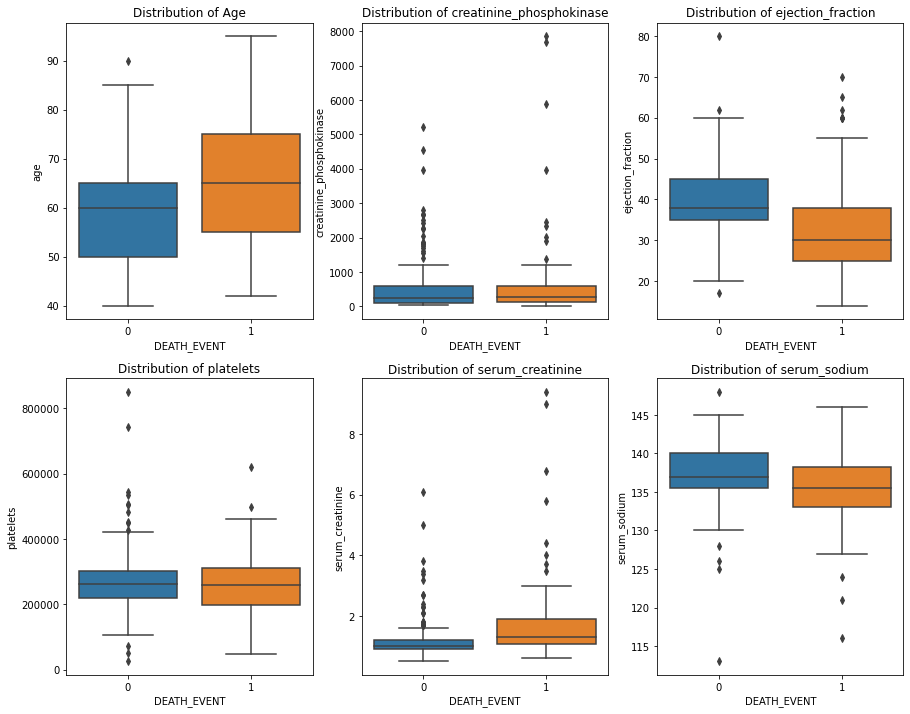

In [64]:
plt.figure(figsize=(15, 12))

plt.subplot(2,3,1)
sns.boxplot(x='DEATH_EVENT', y='age', data=data)
plt.title('Distribution of Age')

plt.subplot(2,3,2)
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=data)
plt.title('Distribution of creatinine_phosphokinase')

plt.subplot(2,3,3)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data)
plt.title('Distribution of ejection_fraction')

plt.subplot(2,3,4)
sns.boxplot(x='DEATH_EVENT', y='platelets', data=data)
plt.title('Distribution of platelets')

plt.subplot(2,3,5)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.title('Distribution of serum_creatinine')

plt.subplot(2,3,6)
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data)
plt.title('Distribution of serum_sodium');

In [65]:
## Feature selection

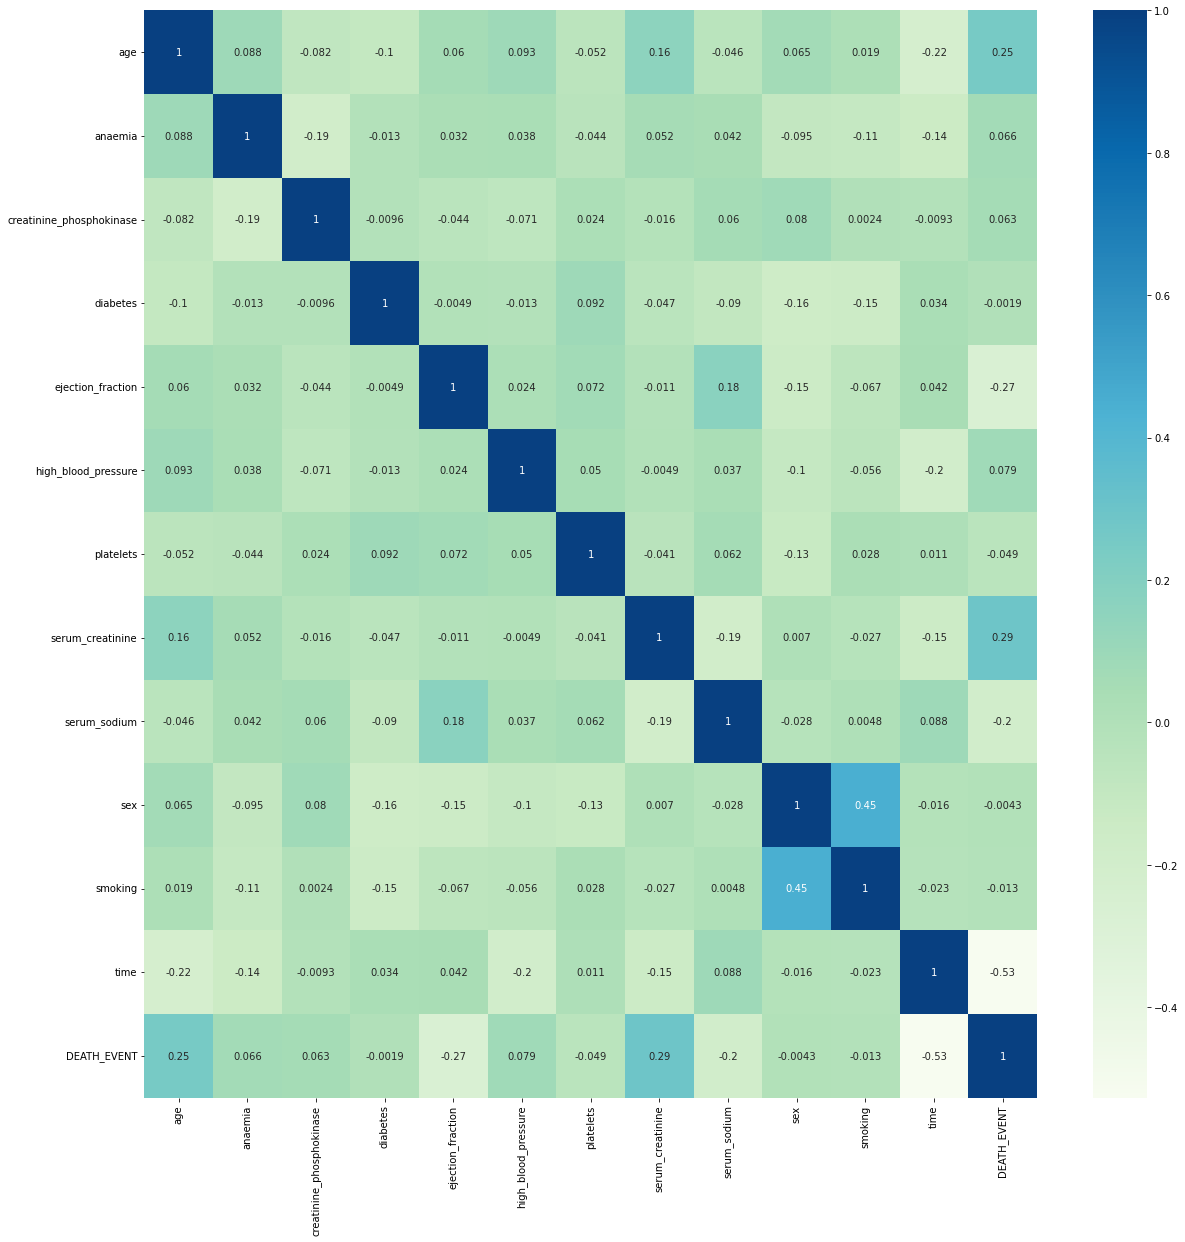

In [66]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="GnBu")

## Analysis / Points to Note here

Time, is the most crucial feature here in relation with target variable Death Event. It holds an inverse relation.
Meaning, if its delayed in finding the inital diagnosis of the disease it could prove fatal.


Similary, Ejection fraction is the second most important feature. 
It is quite expected as it is basically the efficiency of the heart.

Age of the patient and Serum Creatinine are most correlated feature. Clearly as heart's functioning declines with ageing.

Text(0.5, 1.0, 'Distribution Of Age')

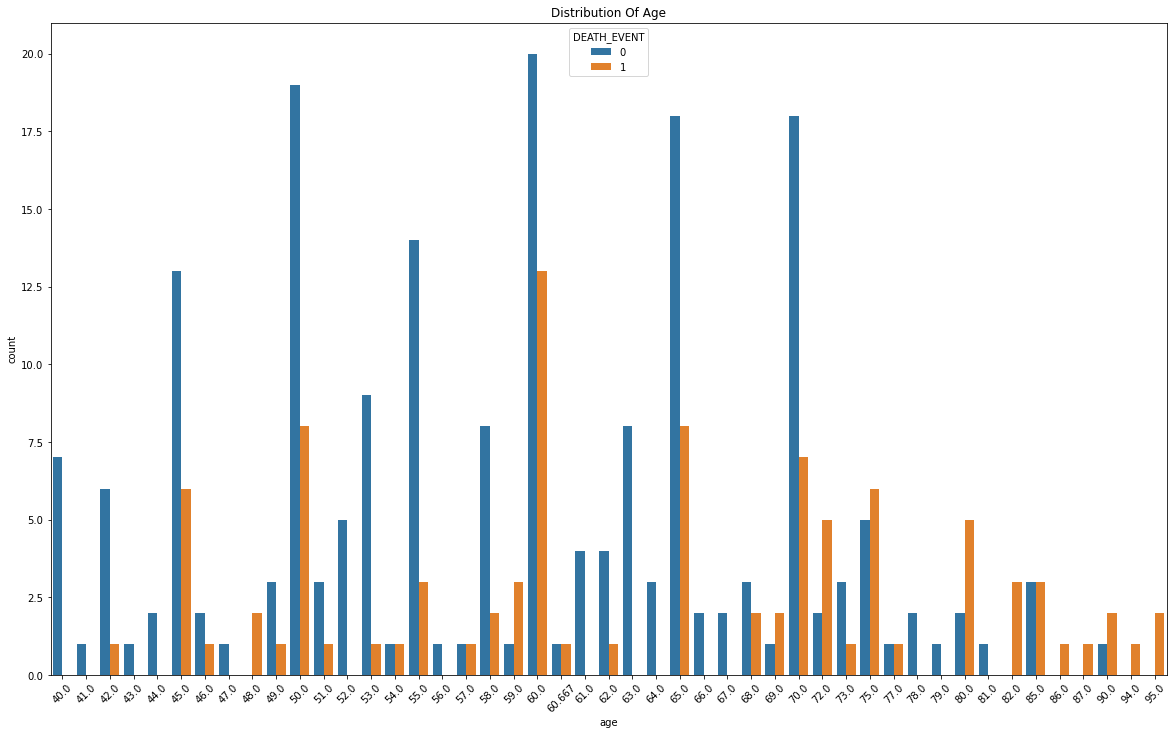

In [67]:
plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.xticks(rotation = 45)
Days_of_week=sns.countplot(x=data['age'],data=data, hue ="DEATH_EVENT")
Days_of_week.set_title("Distribution Of Age")


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

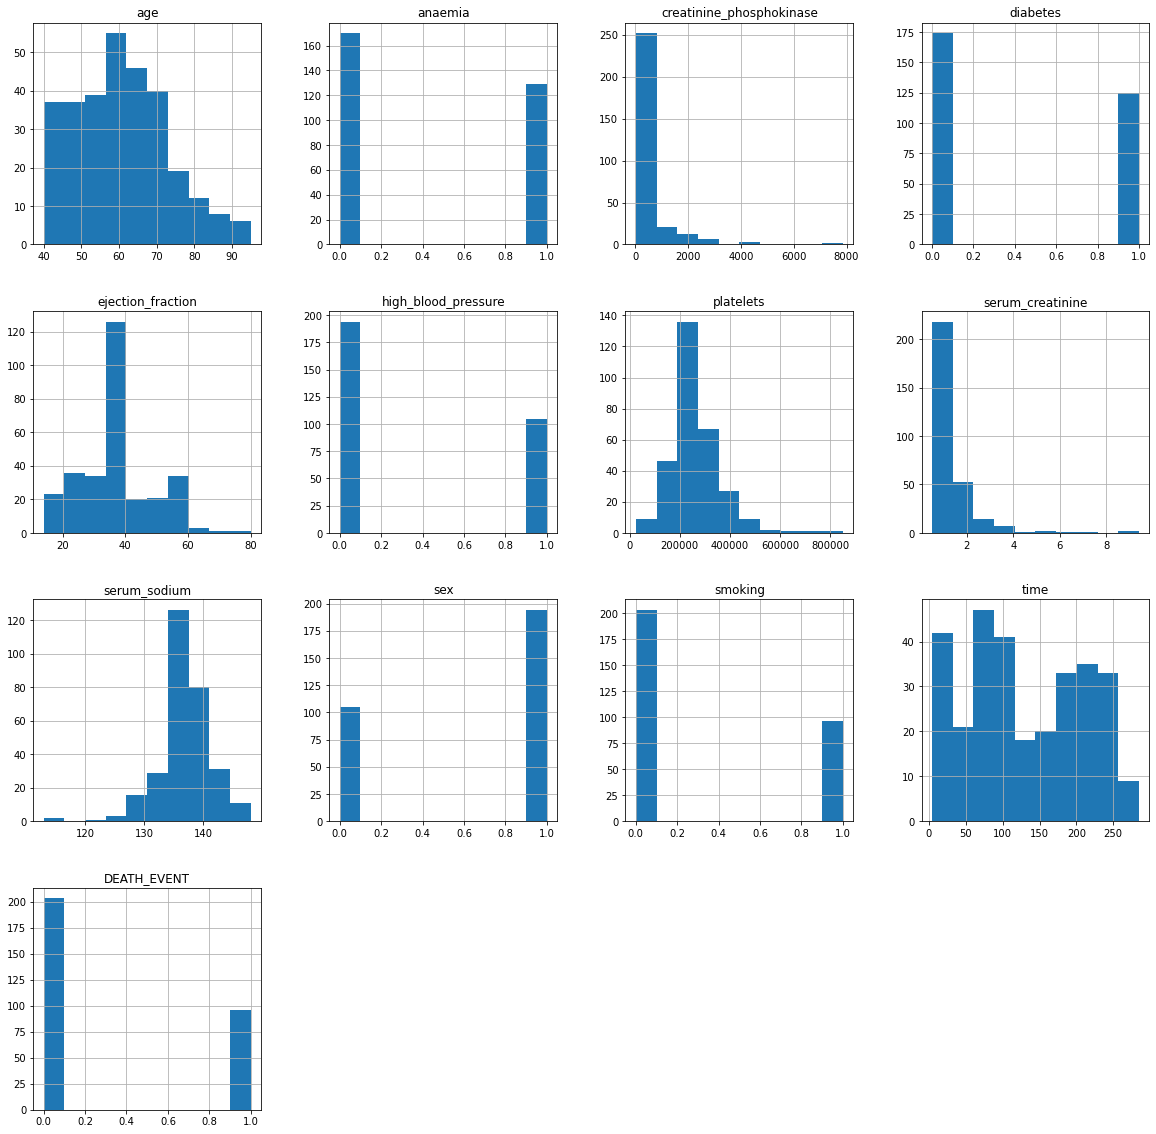

In [68]:
data.hist(figsize=(20,20))

In [69]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [70]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [71]:
## Seprating data features for Target and Features to make the data model ready

In [72]:
target = data['DEATH_EVENT']
features = data.drop(['DEATH_EVENT'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 12) (239,)
Test set: (60, 12) (60,)


#### We can perform random forest model, to find important features and thena ccordingly choose featires to further use for the mdoeling

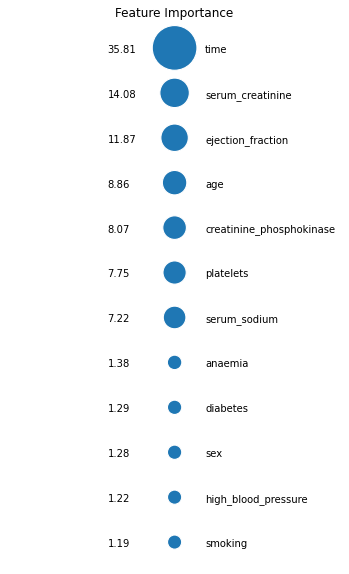

In [73]:
### feature Importance
X = features
y = target


rf = RandomForestClassifier(n_estimators=5000,random_state=11)
rf.fit(X,y)
feat_imp = pd.DataFrame(rf.feature_importances_)
feat_imp.index = pd.Series(data.iloc[:,:-1].columns)
feat_imp = (feat_imp*100).copy().sort_values(by=0,ascending=False)
feat_imp = feat_imp.reset_index()
feat_imp.columns = ["Feature","Importance_score"]

fig = plt.figure(figsize=(6,10))
sns.scatterplot(data=feat_imp,x=5,y=np.linspace(100,0,12),size="Importance_score",sizes=(200,2000),legend=False)
for i,feat,imp in zip(np.linspace(100,0,12),feat_imp["Feature"],feat_imp["Importance_score"]):
    plt.text(x=5.05,y=i-1,s=feat)
    plt.text(x=4.89,y=i-1,s=np.round(imp,2))
plt.axis("off")
plt.title("Feature Importance")
plt.show()

<br>========================================================================================================================

# Linear Regression

In [74]:
## Creating a list of only importatnt
features_model = ['time','ejection_fraction','serum_creatinine' , 'age' , 'creatinine_phosphokinase','platelets','serum_sodium','anaemia','sex','diabetes']

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_data = features[features_model]
y_data = target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)


C_values = np.arange(0.1, 1, 0.1)
accuracy = np.zeros(len(C_values))
classification_reports = []
confusion_matrixes = []

for i, c in enumerate(C_values):
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    pred = LR.predict(X_test)
    accuracy[i] = metrics.accuracy_score(pred, y_test)
    classification_reports.append(metrics.classification_report(y_test, pred))
    confusion_matrixes.append(metrics.confusion_matrix(y_test, pred))

print('Maximum Accuracy achieved:', round(accuracy.max(), 4), 'with', C_values[accuracy.argmax()])
print(f'\nClassification Report:\n{classification_reports[accuracy.argmax()]}')
print(f'Accuracies: {accuracy[:3]}...')


Train set: (209, 10) (209,)
Test set: (90, 10) (90,)
Maximum Accuracy achieved: 0.8222 with 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        64
           1       0.71      0.65      0.68        26

    accuracy                           0.82        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90

Accuracies: [0.8        0.81111111 0.8       ]...


<Figure size 432x288 with 0 Axes>

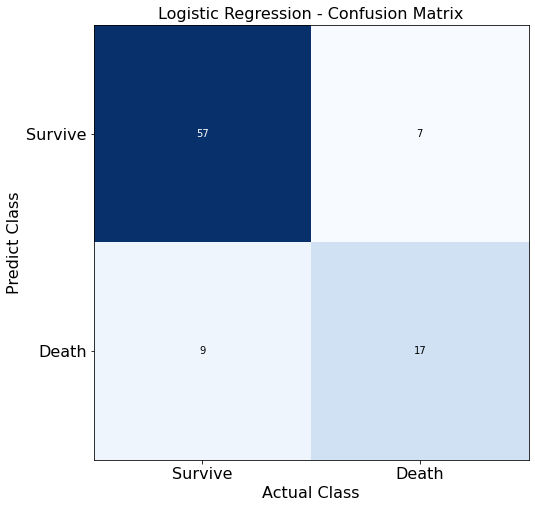

In [76]:
cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix", fontsize=16)
plt.xlabel('Actual Class', fontsize=16)
plt.ylabel('Predict Class', fontsize=16)
plt.xticks(range(2), ["Survive","Death"], fontsize=16)
plt.yticks(range(2), ["Survive","Death"], fontsize=16)
plt.show()

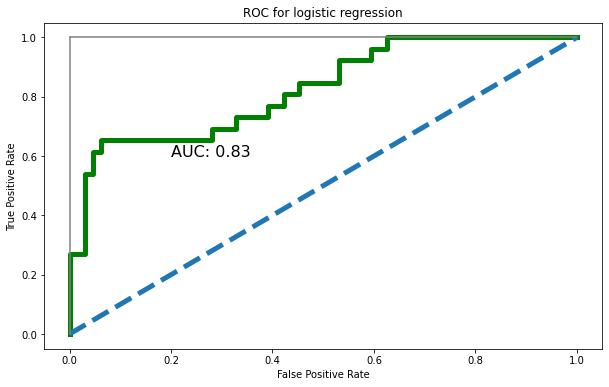

In [77]:
# ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = LR.predict_proba(X_test)[:,1]
false_positive_rate_LR, true_positive_rate_LR, threshold_LR = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_LR, true_positive_rate_LR, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Lets scale the dataset , and try again for the LR model

In [78]:
## We can furhter scale the data to make it standardised and see if it improves our prediction

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)
print(X_data_scaled)

[[-1.62950241 -1.53055953  0.49005699 ... -0.87110478  0.73568819
  -0.84757938]
 [-1.60369074 -0.00707675 -0.28455235 ... -0.87110478  0.73568819
  -0.84757938]
 [-1.5907849  -1.53055953 -0.09090002 ... -0.87110478  0.73568819
  -0.84757938]
 ...
 [ 1.90669738  1.85495776 -0.57503085 ... -0.87110478 -1.35927151
   1.1798305 ]
 [ 1.93250906 -0.00707675  0.00592615 ... -0.87110478  0.73568819
  -0.84757938]
 [ 1.99703825  0.58538877  0.19957848 ... -0.87110478  0.73568819
  -0.84757938]]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.3, random_state=1)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)


C_values = np.arange(0.1, 1, 0.1)
accuracy = np.zeros(len(C_values))
classification_reports = []
confusion_matrixes = []

for i, c in enumerate(C_values):
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    pred = LR.predict(X_test)
    accuracy[i] = metrics.accuracy_score(pred, y_test)
    classification_reports.append(metrics.classification_report(y_test, pred))
    confusion_matrixes.append(metrics.confusion_matrix(y_test, pred))

print('Maximum Accuracy achieved:', round(accuracy.max(), 4), 'with', C_values[accuracy.argmax()])
print(f'\nClassification Report:\n{classification_reports[accuracy.argmax()]}')
print(f'Accuracies: {accuracy[:3]}...')

Train set: (209, 10) (209,)
Test set: (90, 10) (90,)
Maximum Accuracy achieved: 0.8333 with 0.1

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.74      0.65      0.69        26

    accuracy                           0.83        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90

Accuracies: [0.83333333 0.83333333 0.83333333]...


## We see an increase in the Accuracy after using , Standardised Dataset.

<Figure size 432x288 with 0 Axes>

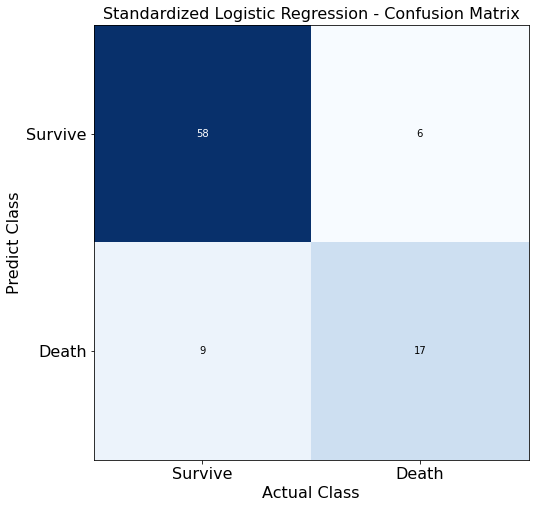

In [81]:
cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Standardized Logistic Regression - Confusion Matrix", fontsize=16)
plt.xlabel('Actual Class', fontsize=16)
plt.ylabel('Predict Class', fontsize=16)
plt.xticks(range(2), ["Survive","Death"], fontsize=16)
plt.yticks(range(2), ["Survive","Death"], fontsize=16)
plt.show()

<br>========================================================================================================================

# Decision Tree

## Scaled Data results and Findings

#### Here, as we see we get an improvised model improving our score further to 83% by making our data scaled.

#### Lets use other model like DT, for the same scaled dataset.

In [82]:
# Decision Tree Classifier

accuracy_list = []
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, test_size=0.3, random_state=1)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
print("Accuracy of Decision tree Classifier is : ", "{:.2f}%".format(100* dt_acc))


Train set: (209, 10) (209,)
Test set: (90, 10) (90,)
Accuracy of Decision tree Classifier is :  84.44%


<Figure size 432x288 with 0 Axes>

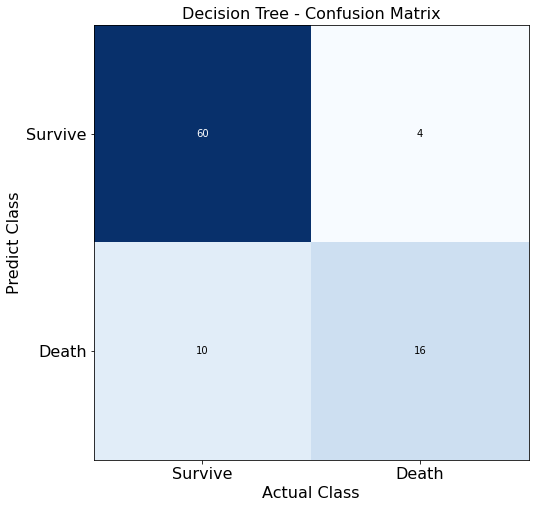

In [83]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix", fontsize=16)
plt.xlabel('Actual Class', fontsize=16)
plt.ylabel('Predict Class', fontsize=16)
plt.xticks(range(2), ["Survive","Death"], fontsize=16)
plt.yticks(range(2), ["Survive","Death"], fontsize=16)
plt.show()

#### By using DT model, we are able to further imporve our model untill 84% on training it with the Scaled data.

## Results

In [84]:
print("Accuracy of Decision tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision tree Classifier is :  84.44%


<br>========================================================================================================================

# KNN

In [85]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import for plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# import KNN and evaluation tools
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

In [86]:
# read the data
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_df.head(5) # shows first 5 lines of the dataset

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [87]:
heart_df.isnull().sum() # checks for null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [88]:
# split into train and test data
x = heart_df.iloc[:,0:12]
y = heart_df.iloc[:,12:]
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 1, test_size = 0.2)
print("Number transactions x_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (239, 12)
Number transactions y_train dataset:  (239, 1)
Number transactions x_test dataset:  (60, 12)
Number transactions y_test dataset:  (60, 1)


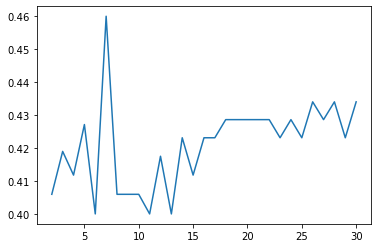

The max F1 score for the data is 0.4599018003273323 when k = 7
[[46  0]
 [14  0]]


In [89]:
# run knn model in a loop to get f1 scores for different values of k
vals = np.arange (2,31) # get an array of numbers from 2 to 30
result = []  # initialize prediction list
for i in vals:
    # choose k based on the vals list
    k_model = knc(n_neighbors = i)
    # first fit the train data to the model
    k_model.fit(X_train,y_train.values.ravel())
    # predict and evaluate model with f1 score
    prediction = k_model.predict(X_test) #predict the y outputs
    result.append(f1_score(y_test,prediction,average = 'macro')) # evaluate the model with f1 score and add to tuple with k value
result
# create plot of f1 scores vs neighbors
plt.plot(vals,result)
plt.xlabel = ('# of Neighbors') # label x axis 
plt.ylabel = ('F1 Score') # label y axis
plt.show()
# print the max f1 score with the k value
orig_max = float(max(result))
print(f'The max F1 score for the data is {orig_max} when k = {vals[result.index(max(result))]}') # take the value that has the same index as the max result
print(confusion_matrix(y_test, prediction))

In [90]:
k_model.score(X_test,y_test) # initial accuracy for model

0.7666666666666667

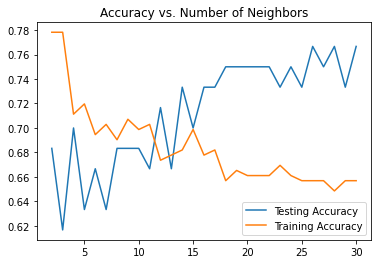

In [91]:
# initiate number of neighbors to be checked
nbrs = np.arange(2, 31)
train_accuracy = np.empty(len(nbrs)) 
test_accuracy = np.empty(len(nbrs))
for i, k in enumerate(nbrs):
    # initiate the value of k used
    knn = knc(n_neighbors=k)
    # fit to the data
    knn.fit(X_train,y_train.values.ravel())
    
    # calculate the accuracy for the training data
    train_accuracy[i] = knn.score(X_train, y_train)

    # calculate accuracy for testing data
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('Accuracy vs. Number of Neighbors')
plt.plot(nbrs, test_accuracy, label = 'Testing Accuracy')
plt.plot(nbrs, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.show()

In [92]:
# scaling the data using a standard scale and minmax scale
std = StandardScaler()
X_std = std.fit_transform(X_train) # fit the training data with the scaler
test_std = std.transform(X_test) # transform the test data
norm = MinMaxScaler()
X_mmx = norm.fit_transform(X_train) #fit/transform the training data with the scaler
test_mmx = norm.transform(X_test) # transform the testing data
X_mmx

array([[0.09090909, 1.        , 0.01365144, ..., 1.        , 1.        ,
        0.42391304],
       [0.27272727, 0.        , 0.00548609, ..., 1.        , 0.        ,
        0.82971014],
       [0.50909091, 1.        , 0.1273284 , ..., 1.        , 0.        ,
        0.69927536],
       ...,
       [0.81818182, 0.        , 0.74751212, ..., 1.        , 1.        ,
        0.24637681],
       [0.67272727, 1.        , 0.01097219, ..., 1.        , 0.        ,
        0.74275362],
       [0.76363636, 1.        , 0.10614953, ..., 0.        , 0.        ,
        0.0942029 ]])

In [93]:
# test the scaled data using the best found K from previous tests (K = 7)
f1s = '' # initialize string result
 # choose k based on the val from above
k_model = knc(n_neighbors = 13)
# first fit the train data to the model
k_model.fit(X_std,y_train.values.ravel())
# predict and evaluate model with f1 score
Sprediction = k_model.predict(test_std) #predict the y outputs
std_f1 = (f1_score(y_test,Sprediction,average = 'macro')) # predict standardized results
f1s = f1s + f"The standard scale F1 score is {std_f1}" # output results
 # choose k based on the val from above
k_model = knc(n_neighbors = 13)
# first fit the train data to the model
k_model.fit(X_mmx,y_train.values.ravel())
# predict and evaluate model with f1 score
Nprediction = k_model.predict(test_mmx) #predict the y outputs
norm_f1 = (f1_score(y_test,Nprediction,average = 'macro')) # predict normalized results
f1s = f1s + f" and the normalized F1 score is {norm_f1}" # output results
f1s

'The standard scale F1 score is 0.7 and the normalized F1 score is 0.6825396825396826'

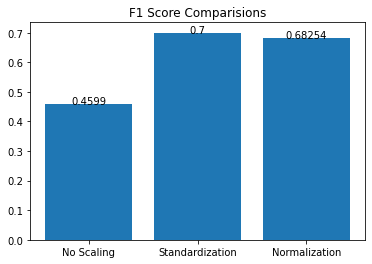

In [94]:
def labels (x,y):
    '''adds labels to the bars in the bar graph'''
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],5), ha = 'center') # takes a y value, rounds it to 5 digits and adds it above the respective bar
xAxis = ['No Scaling', 'Standardization', 'Normalization'] # sets x axis titles
yAxis = [orig_max, std_f1, norm_f1] # inputs y axis values
labels(xAxis,yAxis) # adds F1 score values above bars
plt.bar(xAxis,yAxis) # adds the bars
plt.title('F1 Score Comparisions') # adds title
plt.show()

In [95]:
# confusion Matrix
print("The confusion matrix for standardized data\n", confusion_matrix(Sprediction, y_test))
print("The confusion matrix for normalized data\n", confusion_matrix(Nprediction, y_test))

The confusion matrix for standardized data
 [[45  9]
 [ 1  5]]
The confusion matrix for normalized data
 [[44  9]
 [ 2  5]]


<br>========================================================================================================================

# SVM

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [132]:
X = heart_df.iloc[:, :-2].values
y = heart_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [133]:
# Normalized the data
norm = MinMaxScaler()
X_train_normed = norm.fit_transform(X_train)
X_test_normed = norm.transform(X_test)

In [134]:
# Standarized the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Linear

In [135]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
l_score = classifier.score(X_test, y_test)
print('Preliminary score : {:0.3f}'.format(l_score))

Preliminary score : 0.600


### Normalization

In [136]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_normed, y_train)
y_pred = classifier.predict(X_test_normed)
l_score_norm = classifier.score(X_test_normed, y_test)
print('Preliminary score : {:0.3f}'.format(l_score_norm))

Preliminary score : 0.633


### Standarization

In [137]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)
l_score_std = classifier.score(X_test_std, y_test)
print('Preliminary score : {:0.3f}'.format(l_score_std))

Preliminary score : 0.717


## Polynomial

In [138]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
poly_score = classifier.score(X_test, y_test)
print('Preliminary score : {:0.3f}'.format(poly_score))

Preliminary score : 0.617


### Normalization

In [139]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train_normed, y_train)
y_pred = classifier.predict(X_test_normed)
poly_score_norm = classifier.score(X_test_normed, y_test)
print('Preliminary score : {:0.3f}'.format(poly_score_norm))

Preliminary score : 0.633


### Standarization

In [140]:
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)
poly_score_std = classifier.score(X_test_std, y_test)
print('Preliminary score : {:0.3f}'.format(poly_score_std))

Preliminary score : 0.633


## Radial

In [141]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
rbf_score = classifier.score(X_test, y_test)
print('Preliminary score : {:0.3f}'.format(rbf_score))

Preliminary score : 0.617


### Normalization

In [142]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_normed, y_train)
y_pred = classifier.predict(X_test_normed)
rbf_score_norm = classifier.score(X_test_normed, y_test)
print('Preliminary score : {:0.3f}'.format(rbf_score_norm))

Preliminary score : 0.650


### Standarization

In [143]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)
rbf_score_std = classifier.score(X_test_std, y_test)
print('Preliminary score : {:0.3f}'.format(rbf_score_std))

Preliminary score : 0.717


### Comparison

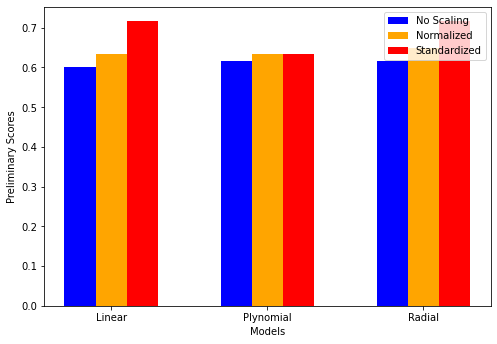

In [144]:
plt=reload(plt)
plt.rcParams["figure.figsize"] = (8,5.5)
x = np.arange(3)
y1 = [l_score, poly_score, rbf_score]
y2 = [l_score_norm, poly_score_norm, rbf_score_norm]
y3 = [l_score_std, poly_score_std, rbf_score_std]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='red')
plt.xticks(x, ["Linear", "Plynomial", "Radial"])
plt.xlabel("Models")
plt.ylabel("Preliminary Scores")
plt.legend(["No Scaling", "Normalized", "Standardized"])
plt.show()

## SVM Prediction

Model : RBF SVM Standardization
Accuracy : 0.717
F1_Score : 0.541
 confusion matrix :  
 [[33  4]
 [13 10]]


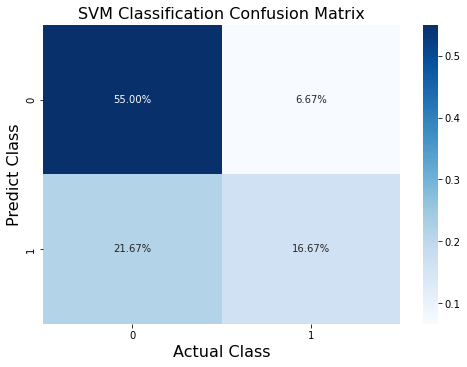

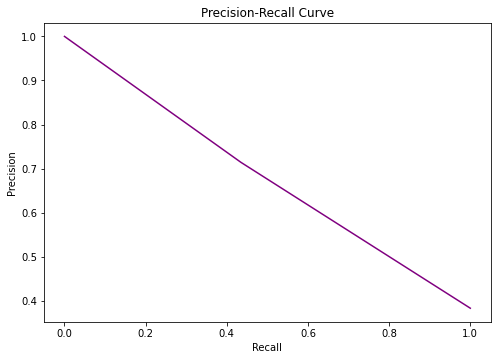

In [150]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)
print("Model : RBF SVM Standardization")
print('=====================================')
print('Accuracy : {:0.3f}'.format(accuracy_score(y_test, y_pred)))
print('=====================================')
print('F1_Score : {:0.3f}'.format(f1_score(y_test, y_pred, zero_division=1)))
print('=====================================')
cm = confusion_matrix(y_test, y_pred)
print( " confusion matrix : " , '\n', cm)

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('SVM Classification Confusion Matrix', fontsize=16)
plt.xlabel('Actual Class', fontsize=16)
plt.ylabel('Predict Class', fontsize=16)
plt.show()

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()